In [19]:
# Importing Libraries 
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\Osama\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Thu Oct 10 08:48:37 2024).


In [20]:
df = df[df['job_title_short'] == 'Data Analyst']

In [29]:
df_exploded = df.explode('job_skills')

skills_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)
skills_stats = skills_stats.sort_values(by='skill_count', ascending=False). head(10)


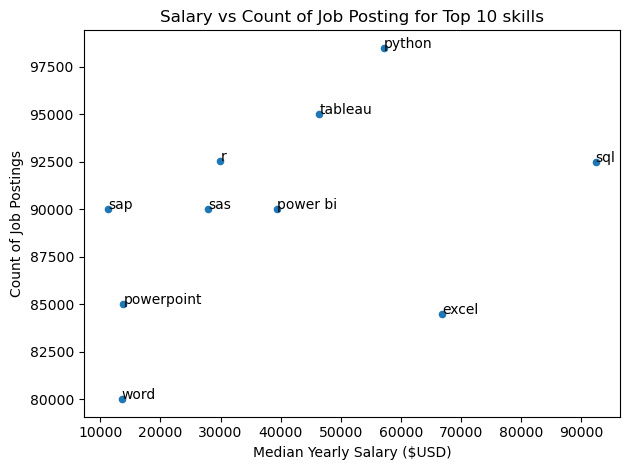

In [44]:
skills_stats.plot(kind='scatter', x ='skill_count', y ='median_salary')
plt.ylabel('Count of Job Postings')
plt.xlabel('Median Yearly Salary ($USD)')
plt.title('Salary vs Count of Job Posting for Top 10 skills')
plt.tight_layout()

for i, txt in enumerate(skills_stats.index):
    plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt)
plt.show()